<a href="https://colab.research.google.com/github/Prat7eek/Insurance-Claim-Prediction---1010/blob/main/Insurance_Claim_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
## Load train.csv

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('/content/drive/MyDrive/train.csv')
data.head(25)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0
5,19,0,5,1,4,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,1.8,2.332649,10,0,-1,0,0,14,1,1,0,1,104,2,0.445982,0.879049,0.406202,3.000000,0.7,0.8,0.4,3,1,8,2,11,3,8,4,2,0,9,0,1,0,1,1,1
6,20,0,2,1,3,1,0,0,1,0,0,0,0,0,0,0,8,1,0,0,0.6,0.1,0.617454,6,1,-1,0,1,11,1,1,0,1,99,2,0.316228,0.639683,0.368782,3.162278,0.2,0.6,0.5,2,2,8,1,8,3,10,3,0,0,10,0,1,0,0,1,0
7,22,0,5,1,4,0,0,1,0,0,0,0,0,0,0,0,13,1,0,0,0.7,0.4,0.607248,11,1,0,0,0,11,1,1,2,1,30,3,0.446990,0.900574,0.374833,3.316625,0.1,0.5,0.1,1,2,7,1,6,1,13,7,1,3,6,1,0,1,0,1,0
8,26,0,5,1,3,1,0,0,0,1,0,0,0,0,0,0,6,1,0,0,0.9,0.7,0.901388,10,1,-1,0,1,14,1,1,0,1,68,3,0.400000,0.780641,0.407431,2.828427,0.9,0.8,0.6,3,1,7,3,9,4,11,4,2,1,5,0,1,0,0,0,1
9,28,1,1,1,2,0,0,0,1,0,0,0,0,0,0,0,4,0,0,1,0.9,1.4,2.316652,11,0,0,1,0,14,1,1,2,1,104,2,0.447214,1.458184,0.390256,3.605551,0.7,0.8,0.8,2,2,8,2,9,1,11,3,5,0,6,0,1,0,0,1,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [7]:
print (data.shape)
data.describe

(595212, 59)


<bound method NDFrame.describe of              id  target  ...  ps_calc_19_bin  ps_calc_20_bin
0             7       0  ...               0               1
1             9       0  ...               1               0
2            13       0  ...               1               0
3            16       0  ...               0               0
4            17       0  ...               1               0
...         ...     ...  ...             ...             ...
595207  1488013       0  ...               1               1
595208  1488016       0  ...               1               1
595209  1488017       0  ...               0               0
595210  1488021       0  ...               0               0
595211  1488027       0  ...               0               0

[595212 rows x 59 columns]>

In [8]:
data.target.max()

1

In [9]:
cor = data.corr()
cor

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,1.000000,-0.000188,0.000826,0.001646,-0.001307,0.000168,0.000022,-0.000093,0.002473,-0.000479,-0.002208,-0.001261,-0.001210,-0.000177,-0.001718,-0.001129,-0.001935,-0.000500,0.001344,0.000816,-0.000999,-0.003829,-0.000976,-0.001052,-0.000403,0.000354,0.002310,-0.000850,-0.001010,-0.002956,0.000748,0.000494,-0.000928,0.002047,0.002641,0.001007,0.001944,-0.000737,0.000709,-0.000331,0.000719,-0.000451,3.638318e-03,-0.000592,0.000957,0.000788,0.000836,0.000518,9.805336e-04,-0.001249,-0.001093,-0.000157,0.001609,-0.001227,-0.001412,-0.001267,-0.001387,0.000194,-0.001267
target,-0.000188,1.000000,0.018570,0.004534,0.008360,0.009360,0.029165,-0.034017,0.034218,0.013147,-0.008237,0.001815,0.002028,0.007810,0.002460,0.007443,-0.021506,-0.027778,0.037053,0.004555,0.022888,0.034800,0.030888,0.016256,-0.031534,0.032401,0.032900,0.020754,0.011537,-0.036395,-0.020342,0.005322,0.001038,0.006129,-0.001213,0.038790,0.053899,-0.004474,0.027667,0.001782,0.001360,0.001907,3.272046e-05,0.000771,0.000082,-0.000103,-0.001006,0.000719,1.060834e-03,0.000371,-0.001133,-0.000446,0.001362,-0.000490,0.000624,-0.000170,0.000552,-0.001744,-0.001072
ps_ind_01,0.000826,0.018570,1.000000,-0.001793,0.223408,0.066645,0.014823,-0.277458,0.005700,0.188583,0.162800,0.001847,-0.016727,-0.023406,-0.008776,-0.024971,0.122137,0.036896,0.101257,-0.112226,0.102212,0.183855,0.139125,-0.056121,-0.116987,0.043756,0.079042,0.213009,0.070192,-0.000639,0.138112,-0.102582,0.010794,0.008188,0.008252,0.161842,0.099752,0.034480,-0.056722,-0.000854,-0.000437,0.001214,-9.430788e-04,-0.001171,0.000147,-0.000658,0.002993,-0.000085,-1.344982e-03,-0.001263,0.001521,0.000199,-0.000891,-0.000397,-0.000012,-0.000868,-0.001504,-0.000162,-0.001464
ps_ind_02_cat,0.001646,0.004534,-0.001793,1.000000,-0.061189,0.147110,-0.014860,-0.125653,0.016398,0.030945,0.110076,-0.000744,0.000772,-0.004616,-0.001187,-0.003649,-0.003854,0.012682,-0.018727,-0.000374,0.061118,0.084260,0.070790,0.002149,0.045233,-0.002532,-0.072190,-0.008407,-0.017301,-0.011781,0.001526,0.009435,0.011401,0.014955,0.019949,-0.110247,-0.080408,-0.012272,-0.008391,0.000683,0.000932,-0.000322,-2.111049e-03,-0.001548,0.000085,-0.000172,-0.002712,0.000356,-2.542520e-05,0.000038,-0.000884,-0.000893,-0.000519,-0.000109,0.000920,0.000547,0.000824,0.000367,-0.002070
ps_ind_03,-0.001307,0.008360,0.223408,-0.061189,1.000000,-0.095856,0.053250,-0.045158,-0.060368,0.014037,0.111306,0.006865,-0.003986,0.001698,0.003929,0.001990,0.170449,-0.018251,0.027691,0.001316,0.003209,0.048338,0.002348,-0.028520,-0.044907,0.095658,0.072990,0.143597,0.008021,0.056337,0.003607,-0.013205,-0.008561,-0.025966,-0.059358,0.088992,0.048308,0.000539,-0.048096,0.000703,-0.000335,0.000177,7.029223e-04,-0.001245,0.002361,0.001533,0.001267,-0.001544,2.302873e-04,-0.002716,-0.002352,0.000133,0.000205,0.000134,-0.000744,0.000158,-0.000218,-0.000882,-0.003709
ps_ind_04_cat,0.000168,0.009360,0.066645,0.147110,-0.095856,1.000000,0.013053,-0.297737,0.304949,0.044978,-0.011442,0.000789,0.001018,-0.001217,-0.000893,-0.000691,0.077071,0.017497,0.007830,-0.025797,0.023846,0.079471,0.065702,0.029379,0.003162,0.022744,-0.045361,0.063399,0.025324,0.064655,-0.008148,-0.041983,0.023010,-0.000615,0.073486,-0.095160,-0.032233,-0.005596,0.040480,-0.002753,-0.000544,0.000

In [10]:
#X = data.loc[:,'ps_ind_01':'ps_calc_20_bin'] 
X = data.drop(['id','target'], axis=1)
X.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [11]:
#y = data[['target']]
y = data.target
y.head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     1
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    1
Name: target, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)

In [13]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20, max_depth=30)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [14]:
model.score(X_test, y_test)

0.9634668290736502

In [15]:
y_predict = model.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
mat = confusion_matrix(y_test, y_predict)
print(mat)
print('Accuracy Score:', accuracy_score(y_test, y_predict))

[[229385      4]
 [  8694      2]]
Accuracy Score: 0.9634668290736502


In [17]:
from sklearn.metrics import roc_auc_score, roc_curve
rf_auc = roc_auc_score(y_test, y_predict)
rf_auc

0.5001062765862914

In [18]:
pr_fpr, pr_tpr, _ = roc_curve(y_test, y_predict)

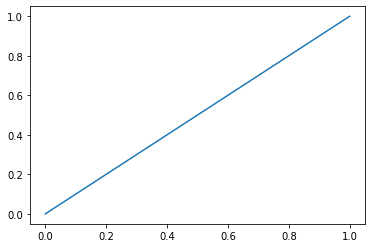

In [19]:
import matplotlib.pyplot as plt
plt.plot(pr_fpr, pr_tpr)

Random Forest ont the data gives us the line along the 50%, which is not a good prediction.

# **Using XGBoost method**



In [20]:
from xgboost import XGBClassifier
XGBClassifier()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [38]:
xgmodel = XGBClassifier(n_estimators=10,
                        max_depth=50,
                        random_state=10,
                        learning_rate=0.05,
                        min_child_rate = 1,
                        subsample=0.5
                        )
xgmodel.fit(X_train, y_train)
y_xgpredict = xgmodel.predict(X_test)
y_xgpredict_train = xgmodel.predict(X_train)
from sklearn.metrics import accuracy_score
print('Test Accuracy for XG Boost:', accuracy_score(y_test, y_xgpredict))
print('Train Accuracy for XG Boost:', accuracy_score(y_train, y_xgpredict_train))

Test Accuracy for XG Boost: 0.9634752294348657
Train Accuracy for XG Boost: 0.9636403856331222


In [27]:
y_xgpredict = xgmodel.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
print('Accuracy for XG Boost:', accuracy_score(y_test, y_xgpredict))

Accuracy for XG Boost: 0.963471029254258


## **We need to use PCA to reduce the number of features**